## Analyze Audio 🎶

In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
music_file = 'lstm1_mp3.mp3'

In [2]:
# music_samples , sample_rate = librosa.load(music_file, sr=None, mono=False)
music_samples , sample_rate = librosa.load(music_file)
music_duration = music_samples.size/sample_rate

Sample Rate: 22.05 kHz
Time b/w each sample: 0.045351473922902494 ms
Num Samples: (3352896,)
Song duration: 152.05877551020407 sec


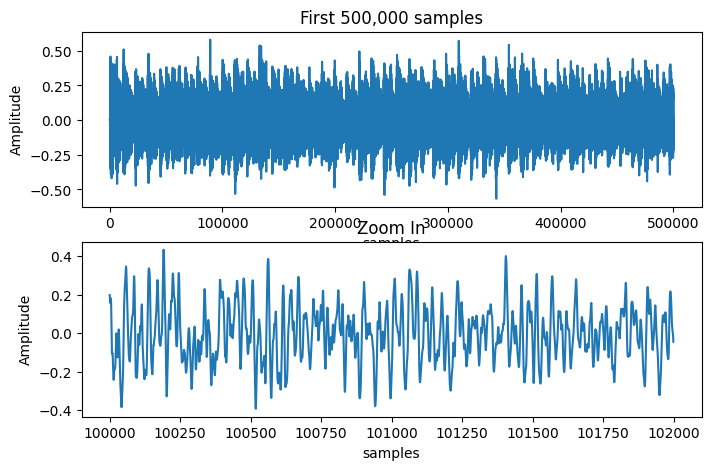

In [3]:
# some song information
print('Sample Rate:', sample_rate/1000, 'kHz')
print('Time b/w each sample:', 1000/sample_rate, 'ms')
print('Num Samples:', music_samples.shape)
print('Song duration:', music_duration, 'sec')

fig , (ax1, ax2) = plt.subplots(2 , 1 , figsize=[8, 5])
ax1.plot(music_samples[0:500000])
ax1.set_title('First 500,000 samples')
ax1.set_xlabel('samples')
ax1.set_ylabel('Amplitude')

ax2.plot(np.arange(100000,102000), music_samples[100000:102000])
ax2.set_title('Zoom In')
ax2.set_xlabel('samples')
ax2.set_ylabel('Amplitude');
# fig.show()

In [4]:
# matrix -- horizontal = time --- vertical = freq --- value = amp
window_size = 512
n_fft = 2048*1

stft_complex = librosa.stft(music_samples, hop_length=window_size, n_fft=n_fft)
stft_abs = np.abs(stft_complex)
print('Dimensions:', stft_abs.shape)

Dimensions: (1025, 6549)


In [5]:
music_samples.size/window_size

6548.625

In [6]:
np.max(stft_abs)

93.180305

In [7]:
# get spectrogram + change amp. to db
spectrogram = librosa.amplitude_to_db(stft_abs, ref=np.max)
print(spectrogram[0:100,0:100])
print('max dB:', np.max(spectrogram),'min dB:', np.min(spectrogram))

[[-46.40143  -32.411404 -28.850775 ... -44.89243  -52.70325  -64.49272 ]
 [-46.23255  -33.48685  -32.849644 ... -49.641968 -50.24156  -47.906265]
 [-45.67437  -34.602898 -42.60255  ... -44.05581  -39.51572  -34.7307  ]
 ...
 [-41.60156  -31.026382 -33.11964  ... -42.327103 -40.14679  -45.207058]
 [-42.59212  -34.268883 -36.351086 ... -45.775738 -41.849705 -51.31279 ]
 [-43.814266 -37.52425  -44.60898  ... -42.266068 -48.911495 -45.36352 ]]
max dB: 0.0 min dB: -80.0


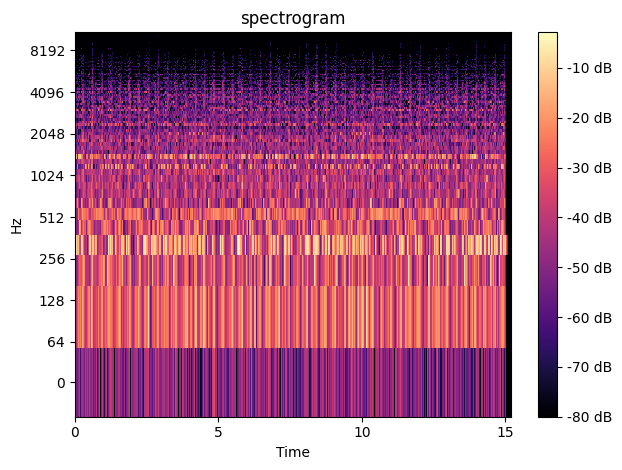

In [8]:
# view spectrogram
librosa.display.specshow(spectrogram[::10,::10], y_axis='log', x_axis='time')
plt.title('spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()


## Animate ⚡

In [9]:
def spectrogram_idx_from_t_s(t_s):
    return int(t_s*spectrogram.shape[1]/music_duration)

In [10]:
spectrogram_n_freq = spectrogram.shape[0]

In [11]:
spectrogram_idx_from_t_s(150.50)

6481

In [12]:
screen_w , screen_h = 1200 , 600

n_bars = spectrogram_n_freq//10
bar_w = screen_w/n_bars

In [13]:
n_bars

102

In [14]:
bar_hts = spectrogram[:,spectrogram_idx_from_t_s(50)]
win_len = spectrogram_n_freq // n_bars
bar_ht = np.array([np.mean(bar_hts[i:i+win_len]) for i in range(n_bars)])
bar_ht.size

102

In [15]:
import pygame
print('Music Vizualizer !')

pygame.init()

# Set up the drawing window
screen_w , screen_h = 1200 , 600
screen = pygame.display.set_mode([screen_w, screen_h])
pygame.display.set_caption('Music Vizualizer !!!')
clock = pygame.time.Clock()

# load music
pygame.mixer.music.load(music_file)
pygame.mixer.music.play(0)
pygame.mixer.init()

# objects
# bg
bg_color = (255, 250, 255)

# particles

# bars
n_bars = spectrogram_n_freq//20
bar_w = screen_w/n_bars

def bar(i , bar_ht):
    # bar_ht is array of size n_bars
    return pygame.Rect(i*bar_w, screen_h/2, bar_w, bar_ht[i])

color_bars = (250, 100, 0)
color_bars2 = (255, 200, 50)


# Run until the user asks to quit
t_ms, t_ms_prev = 0, 0

running = True
while running:
    # handle user closing window
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
    
    # time sync
    t_ms = pygame.mixer.music.get_pos()
    t_s = t_ms/1000
    delta_t_ms = t_ms - t_ms_prev
    t_ms_prev = t_ms

    # dynamics
    bar_hts = spectrogram[:,spectrogram_idx_from_t_s(t_s)]
    win_len = spectrogram_n_freq // n_bars
    bar_ht = np.array([np.mean(bar_hts[i:i+win_len]) for i in range(n_bars)]) + 85
    # bar_ht = np.random.randint(10, 100, n_bars)
    
    # visuals
    screen.fill(bg_color)
    
    for i in range(n_bars):
        pygame.draw.rect(screen, color_bars2, bar(i, bar_ht*2.5))
    
    for i in range(n_bars):
        pygame.draw.rect(screen, color_bars, bar(i, bar_ht*1.5))


    
    # Update the display
    pygame.display.flip()
    # ckh and limit fps
    # print('fps:', int(clock.get_fps()), 't:', t_s)
    clock.tick(60)
    

# Done
pygame.quit()

pygame 2.3.0 (SDL 2.24.2, Python 3.9.5)
Hello from the pygame community. https://www.pygame.org/contribute.html
Music Vizualizer !


C:\Users\Manish\AppData\Local\Temp\ipykernel_12308\3405403088.py:29: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  return pygame.Rect(i*bar_w, screen_h/2, bar_w, bar_ht[i])


In [123]:
bar_ht = np.random.randint(10, 100, n_bars)
bar(4, bar_ht)

<rect(47, 300, 11, 72)>

In [114]:
bar_w

0.7804878048780488

In [17]:
import pygame
print('Music Vizualizer !')

pygame.init()

# Set up the drawing window
screen_w , screen_h = 1200 , 600
screen = pygame.display.set_mode([screen_w, screen_h])
pygame.display.set_caption('Music Vizualizer !!!')
clock = pygame.time.Clock()

# load music
pygame.mixer.music.load(music_file)
pygame.mixer.music.play(0)
pygame.mixer.init()

# objects
# bg
bg_color = (255, 250, 255)

# particles

# bars
n_bars = spectrogram_n_freq//5
bar_w = screen_w/n_bars

def bar(i , bar_ht):
    # bar_ht is array of size n_bars
    return pygame.Rect(i*bar_w, screen_h/2, bar_w, bar_ht[i])

color_bars1 = (250, 100, 0)
color_bars2 = (255, 200, 50)
color_bars3 = (255, 250, 10)


# Run until the user asks to quit
t_ms, t_ms_prev = 0, 0

running = True
while running:
    # handle user closing window
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
    
    # time sync
    t_ms = pygame.mixer.music.get_pos()
    t_s = t_ms/1000
    delta_t_ms = t_ms - t_ms_prev
    t_ms_prev = t_ms

    # dynamics
    bar_hts = spectrogram[:,spectrogram_idx_from_t_s(t_s)]
    win_len = spectrogram_n_freq // n_bars
    bar_ht = np.array([np.mean(bar_hts[i:i+win_len]) for i in range(n_bars)]) - np.min(spectrogram)
    # bar_ht = np.random.randint(10, 100, n_bars)
    
    # visuals
    screen.fill(bg_color)

    for i in range(n_bars):
        pygame.draw.rect(screen, color_bars3, bar(i, bar_ht*4))
    
    for i in range(n_bars):
        pygame.draw.rect(screen, color_bars2, bar(i, bar_ht*2.5))
    
    for i in range(n_bars):
        pygame.draw.rect(screen, color_bars1, bar(i, bar_ht*1.5))


    
    # Update the display
    pygame.display.flip()
    # ckh and limit fps
    # print('fps:', int(clock.get_fps()), 't:', t_s)
    clock.tick(60)
    

# Done
pygame.quit()

Music Vizualizer !


C:\Users\Manish\AppData\Local\Temp\ipykernel_12308\3663852532.py:29: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  return pygame.Rect(i*bar_w, screen_h/2, bar_w, bar_ht[i])
